# Sprint3課題 機械学習スクラッチ線形回帰

## 【問題1】線形回帰のクラスを作成する

In [1]:
"""
データを作成
KaggleのHouse　Priceを使用
"""
import pandas as pd
import numpy as np

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

df_train = pd.read_csv('../sprint2/train.csv')

#　５つ以上の欠損値がある特徴量削除
df_train.dropna(thresh=1460-5, axis=1, inplace=True)

#　欠損値があるサンプルを削除
df_train.dropna(inplace=True)

# 説明変数と目的変数に分割
X = df_train[['GrLivArea', 'YearBuilt']].values
y = df_train[['SalePrice']].values.flatten()


(X_train, X_val,
 y_train, y_val) = train_test_split(X, y, test_size=0.3)

#標準化
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)


In [11]:
from utils.linear import ScratchLinearRegression

linear = ScratchLinearRegression(lr=0.01)
linear.fit(X_train, y_train, X_val, y_val)

## 【問題2】学習曲線のプロット

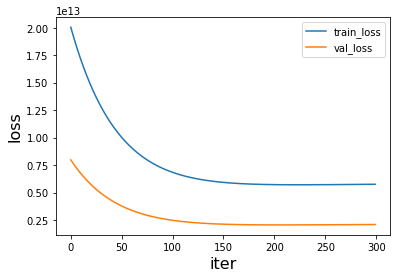

In [12]:
linear.plot()

## 【問題3】（アドバンス課題）バイアス項の除去

推測としては、切片がないのですごくずれた線形回帰が算出されそうである。  
数式から読み解いてみることにする。

$$
\dfrac{1}{2m}\sum_{i=1}^{m}\bigl(h_\theta(x^i)-y^i)\bigr)^{2}
$$

上記の目的関数を$\theta_0$に着目して変換すると、

$$
\begin{align}
\dfrac{1}{2m}\sum_{i=1}^{m}\bigl(h_\theta(x^i)-y^i)\bigr)^{2}=\dfrac{1}{2m}\sum_{i=1}^{m}\bigl(\theta_0+どうなるんだろうか。。h_\theta(x^i)-y^i)\bigr)^{2}
\end{align}
$$

この先の計算がわからない。  
調査によると、バイアスパラメータは目標値の平均と基底関数の平均のズレを吸収してくれる。

## 【問題4】（アドバンス課題）特徴量の多次元化

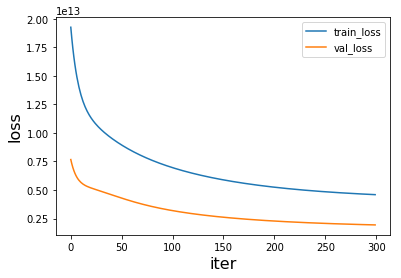

In [13]:
#特徴量の２乗
linear.fit(X_train**2, y_train, X_val**2, y_val)
linear.plot()

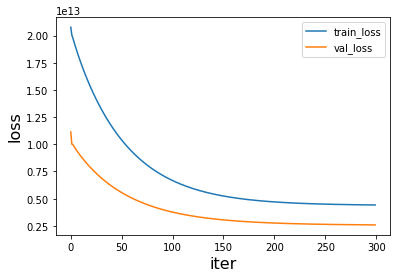

In [14]:
#特徴量の3乗
linear.fit(X_train**3, y_train, X_val**3, y_val)
linear.plot()

## 【問題5】（アドバンス課題）更新式の導出

$$
\begin{align}
\theta_j:&=\theta_j-\dfrac{\partial}{\partial \theta_j}J(\theta)\\
&=\theta_j-\dfrac{\partial}{\partial \theta_j}\dfrac{1}{2m}\sum_{i=1}^{m}\bigl(h_\theta(x^i)-y^i)\bigr)^{2}\\
&=\theta_j-\dfrac{1}{2m}\sum_{i=1}^{m}2\cdot\bigl(h_\theta(x^i)-y^i\bigr)\cdot\bigl(h_\theta(x^i)-y^i\bigr)'\\
&=\theta_j-\dfrac{1}{m}\sum_{i=1}^{m}\bigl(h_\theta(x^i)-y^i\bigr)\cdot(x_j^i)\\
\end{align}
$$

## 【問題6】（アドバンス課題）局所最適解の問題

## 【問題7】スクラッチで学べることは何か

スクラッチをすることで、ロジックが理解できるようになる。また既存のもののロジック理解にも助かる。  
論文を読む際に数式が出てくるので、数式を起こせるようになる。